In [17]:
import cv2
import torch
import time
import random
from pathlib import Path
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
video_path = "/content/drive/MyDrive/VID_20250815_075634.mp4"
model_names = ["yolov8n", "yolo11n", "yolo12n"]
desired_frame = 40

models = {}
for model_name in model_names:
    models[model_name] = YOLO(f"{model_name}.pt")

In [41]:
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {total_frames}")

if desired_frame < 0 or desired_frame >= total_frames:
    raise ValueError(f"Frame number must be between 0 and {total_frames - 1}")

Total frames: 71


In [42]:
current_frame = 0
frame = None
while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break
    if current_frame == desired_frame:
        frame = img
        break
    current_frame += 1
cap.release()

if frame is None:
    raise ValueError(f"Could not read frame {desired_frame}")

In [43]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

results_images = []
for model_name in model_names:
    result = models[model_name](frame_rgb, verbose=False)
    plotted_img = result[0].plot()
    results_images.append((model_name, cv2.cvtColor(plotted_img, cv2.COLOR_BGR2RGB)))

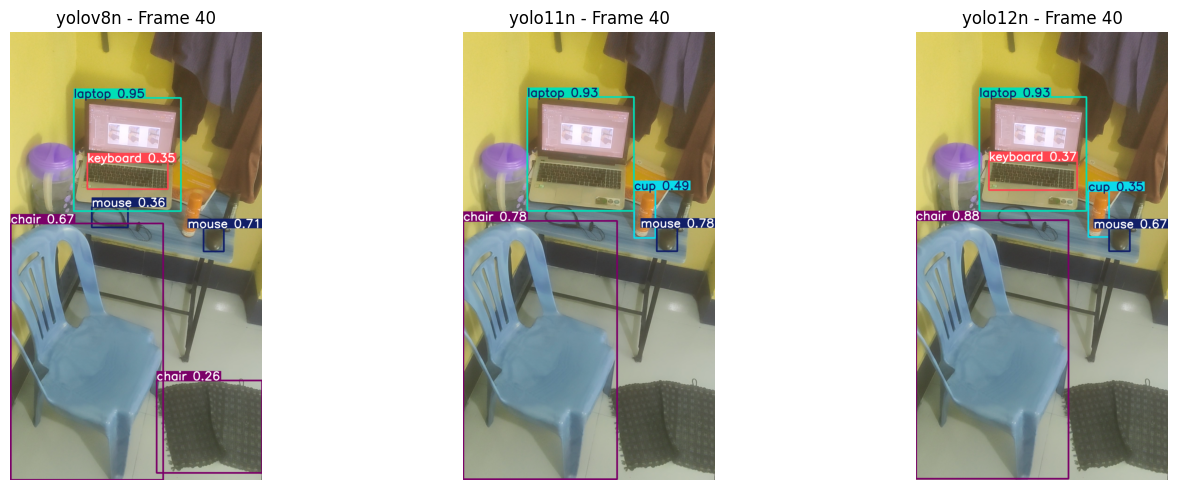

In [44]:
plt.figure(figsize=(15, 5))
for i, (name, img) in enumerate(results_images):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{name} - Frame {desired_frame}")
    plt.axis("off")
plt.tight_layout()
plt.show()